# Goal: To permutate different SMILES representations of the same mol and to breakdown aromatic form back to kekule form for various processing purposes thereafter 

In [1]:
import numpy as np
import pandas as pd

from rdkit import rdBase, Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

In [2]:
import random

def randomSmiles(m1):
    m1.SetProp("_canonicalRankingNumbers", "True")
    idxs = list(range(0,m1.GetNumAtoms()))
    random.shuffle(idxs)
    for i,v in enumerate(idxs):
        m1.GetAtomWithIdx(i).SetProp("_canonicalRankingNumber", str(v))
    return Chem.MolToSmiles(m1)

smi1 = "C12=CC=CC=C1C=C3C(C=CC=C3)=C2"
smi2 = "c1ccc2cc3ccccc3cc2c1"

m1 = Chem.MolFromSmiles(smi1)
m2 = Chem.MolFromSmiles(smi2)
s1 = set()
s2 = set()
for i in range(1000):
    smiles = randomSmiles(m1)
    s1.add(smiles)
for i in range(1000):
    smiles = randomSmiles(m2)
    s2.add(smiles)
print(s1)
print()
print(s1 == s2)

{'c1ccc2c(cc3c(c2)cccc3)c1', 'c1ccc2c(c1)cc1ccccc1c2', 'c12c(cc3c(cccc3)c1)cccc2', 'c1cccc2cc3ccccc3cc12', 'c1cc2c(cc3ccccc3c2)cc1', 'c1cc2c(cc1)cc1ccccc1c2', 'c12cc3ccccc3cc1cccc2', 'c1cc2cc3c(cccc3)cc2cc1', 'c12cc3c(cccc3)cc1cccc2', 'c1ccc2cc3ccccc3cc2c1', 'c1cc2c(cc1)cc1c(cccc1)c2', 'c1c2c(cc3ccccc3c2)ccc1', 'c1c2c(cc3c1cccc3)cccc2', 'c1cc2cc3c(cc2cc1)cccc3', 'c1c2c(ccc1)cc1ccccc1c2', 'c1c2c(ccc1)cc1c(cccc1)c2', 'c1c2ccccc2cc2ccccc12', 'c1c2c(cc3ccccc13)cccc2', 'c1c2c(cc3c(c2)cccc3)ccc1', 'c12c(cccc1)cc1ccccc1c2', 'c1ccc2c(c1)cc1c(c2)cccc1', 'c1c2ccccc2cc2c1cccc2', 'c1ccc2cc3c(cc2c1)cccc3', 'c12ccccc1cc1c(c2)cccc1', 'c1c2c(ccc1)cc1c(c2)cccc1', 'c1ccc2c(c1)cc1c(cccc1)c2', 'c1cc2cc3ccccc3cc2cc1', 'c1c2cc3c(cc2ccc1)cccc3', 'c12ccccc1cc1ccccc1c2', 'c12ccccc1cc1c(cccc1)c2', 'c1cc2c(cc3c(c2)cccc3)cc1', 'c1cccc2cc3c(cccc3)cc12', 'c1c2c(cccc2)cc2c1cccc2', 'c1cc2c(cc3c(cccc3)c2)cc1', 'c1c2cc3ccccc3cc2ccc1', 'c1ccc2cc3c(cccc3)cc2c1', 'c1cccc2c1cc1c(cccc1)c2', 'c12cc3c(cc1cccc2)cccc3', 'c1ccc2

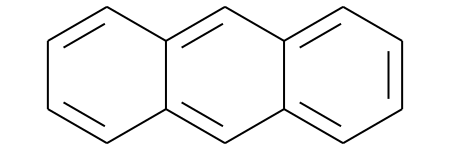

c1cccc2cc3c(cccc3)cc12
C1:C:C:C:C2:C:C3:C(:C:C:C:C:3):C:C:1:2
False
False
False
False
False
False
False
False
False
False
False
False
False
False


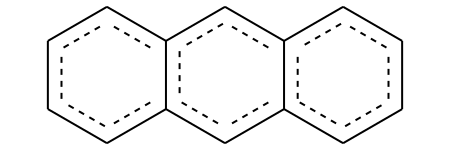

C1:C:C:C:C2:C:C3:C(:C:C:C:C:3):C:C:1:2
c1cccc2cc3c(cccc3)cc12
True
True
True
True
True
True
True
True
True
True
True
True
True
True


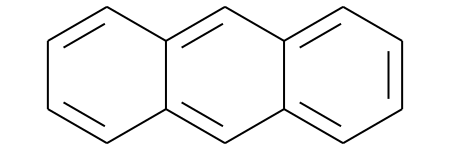

In [3]:
display(m1)
print(Chem.MolToSmiles(m1))
for idx in range(m1.GetNumAtoms()):
    m1.GetAtomWithIdx(idx).SetIsAromatic(False)
print(Chem.MolToSmiles(m1))
for idx in range(m1.GetNumAtoms()):
    print(m1.GetAtomWithIdx(idx).GetIsAromatic())
display(m1)
print(Chem.MolToSmiles(m1))
for idx in range(m1.GetNumAtoms()):
    m1.GetAtomWithIdx(idx).SetIsAromatic(True)
print(Chem.MolToSmiles(m1))
for idx in range(m1.GetNumAtoms()):
    print(m1.GetAtomWithIdx(idx).GetIsAromatic())
display(m1)

In [4]:
for idx in range(m1.GetNumBonds()):
    m1.GetBondWithIdx(idx).SetBondType(Chem.rdchem.BondType.DOUBLE)
print(Chem.MolToSmiles(m1))

c1cccc2cc3c(cccc3)cc12


In [5]:
degs = []
for idx in range(m1.GetNumAtoms()):
    degs.append(m1.GetAtomWithIdx(idx).GetDegree())
degs

[3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2]

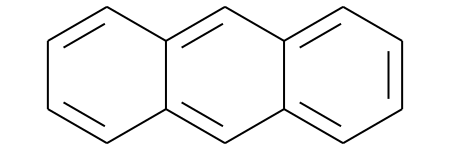

In [6]:
for idx in range(m1.GetNumAtoms()):
    if degs[idx] == 3:
        m1.GetBondWithIdx(idx).SetBondType(Chem.rdchem.BondType.DOUBLE)
    if degs[idx] == 2:
        m1.GetBondWithIdx(idx).SetBondType(Chem.rdchem.BondType.SINGLE)
Chem.MolToSmiles(m1)
display(m1)

In [7]:
for idx in range(m1.GetNumAtoms()):
    print(m1.GetBondWithIdx(idx).GetBondType())


DOUBLE
SINGLE
SINGLE
SINGLE
SINGLE
DOUBLE
SINGLE
DOUBLE
DOUBLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE


In [8]:
mol = Chem.MolFromSmiles(smi2)

In [9]:
smi2

'c1ccc2cc3ccccc3cc2c1'

In [10]:
smiles3D = Chem.MolToSmiles(mol, kekuleSmiles=True)
smiles3D

'C1:C:C:C2:C:C3:C:C:C:C:C:3:C:C:2:C:1'

In [11]:
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions

def decode_stereo(smiles2D):
    mol = Chem.MolFromSmiles(smiles2D)
    dec_isomers = list(EnumerateStereoisomers(mol))

    dec_isomers = [Chem.MolFromSmiles(Chem.MolToSmiles(mol, isomericSmiles=True)) for mol in dec_isomers]
    smiles3D = [Chem.MolToSmiles(mol, isomericSmiles=True) for mol in dec_isomers]

    chiralN = [atom.GetIdx() for atom in dec_isomers[0].GetAtoms() if int(atom.GetChiralTag()) > 0 and atom.GetSymbol() == "N"]
    if len(chiralN) > 0:
        for mol in dec_isomers:
            for idx in chiralN:
                mol.GetAtomWithIdx(idx).SetChiralTag(Chem.rdchem.ChiralType.CHI_UNSPECIFIED)
            smiles3D.append(Chem.MolToSmiles(mol, isomericSmiles=True))

    return smiles3D

In [12]:
decode_stereo(smi2)

['c1ccc2cc3ccccc3cc2c1']

In [13]:
MAX_STRUCTURES = 1000
class ResonanceEnumerator(object):
    """Simple wrapper around RDKit ResonanceMolSupplier.
    """

    def __init__(self, kekule_all=False, allow_incomplete_octets=False, unconstrained_cations=False,
                 unconstrained_anions=False, allow_charge_separation=False, max_structures=MAX_STRUCTURES):
        """
        :param bool allow_incomplete_octets: include resonance structures whose octets are less complete than the the most octet-complete structure.
        :param bool allow_charge_separation: include resonance structures featuring charge separation also when uncharged resonance structures exist.
        :param bool kekule_all: enumerate all possible degenerate Kekule resonance structures (the default is to include just one).
        :param bool unconstrained_cations: if False positively charged atoms left and right of N with an incomplete octet are acceptable only if the conjugated group has a positive total formal charge.
        :param bool unconstrained_anions: if False, negatively charged atoms left of N are acceptable only if the conjugated group has a negative total formal charge.
        :param int max_structures: Maximum number of resonance forms.
        """
        self.kekule_all = kekule_all
        self.allow_incomplete_octets = allow_incomplete_octets
        self.unconstrained_cations = unconstrained_cations
        self.unconstrained_anions = unconstrained_anions
        self.allow_charge_separation = allow_charge_separation
        self.max_structures = max_structures

    def __call__(self, mol):
        """Calling a ResonanceEnumerator instance like a function is the same as calling its enumerate(mol) method."""
        return self.enumerate(mol)

    def enumerate(self, mol):
        """Enumerate all possible resonance forms and return them as a list.
        :param mol: The input molecule.
        :type mol: rdkit.Chem.rdchem.Mol
        :return: A list of all possible resonance forms of the molecule.
        :rtype: list of rdkit.Chem.rdchem.Mol
        """
        flags = 0
        if self.kekule_all:
            flags = flags | Chem.KEKULE_ALL
        if self.allow_incomplete_octets:
            flags = flags | Chem.ALLOW_INCOMPLETE_OCTETS
        if self.allow_charge_separation:
            flags = flags | Chem.ALLOW_CHARGE_SEPARATION
        if self.unconstrained_anions:
            flags = flags | Chem.UNCONSTRAINED_ANIONS
        if self.unconstrained_cations:
            flags = flags | Chem.UNCONSTRAINED_CATIONS
        results = []
        for result in Chem.ResonanceMolSupplier(mol, flags=flags, maxStructs=self.max_structures):
            # This seems necessary? ResonanceMolSupplier only does a partial sanitization
            Chem.SanitizeMol(result)
            results.append(result)
        return results

        # Potentially interesting: getNumConjGrps(), getBondConjGrpIdx() and getAtomConjGrpIdx()


def enumerate_resonance_smiles(smiles):
    """Return a set of resonance forms as SMILES strings, given a SMILES string.
    :param smiles: A SMILES string.
    :returns: A set containing SMILES strings for every possible resonance form.
    :rtype: set of strings.
    """
    mol = Chem.MolFromSmiles(smiles)
    #Chem.SanitizeMol(mol)  # MolFromSmiles does Sanitize by default
    mesomers = ResonanceEnumerator().enumerate(mol)
    return {Chem.MolToSmiles(m, isomericSmiles=True) for m in mesomers}

In [14]:
enumerate_resonance_smiles("C12=CC=CC=C1C=C3C(C=CC=C3)=C2")

{'c1ccc2cc3ccccc3cc2c1'}

In [15]:
mol1 = Chem.MolFromSmiles("C12=CC=CC=C1C=C3C(C=CC=C3)=C2")
list(Chem.CanonicalRankAtoms(mol1))

[10, 4, 0, 1, 5, 11, 9, 13, 12, 6, 2, 3, 7, 8]

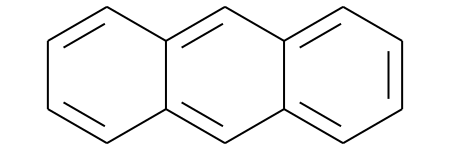

In [16]:
mol1

In [17]:
Chem.MolToSmiles(mol1, allHsExplicit = True, kekuleSmiles = True)

'[CH]1:[CH]:[CH]:[C]2:[CH]:[C]3:[CH]:[CH]:[CH]:[CH]:[C]:3:[CH]:[C]:2:[CH]:1'

In [18]:
"C12=CC=CC=C1C=C3C(C=CC=C3)=C2"

'C12=CC=CC=C1C=C3C(C=CC=C3)=C2'

## Trying networkx and pysmiles - conversion to nx graph and back to smiles does not work unfortunately 

In [36]:
from pysmiles import write_smiles, read_smiles
import networkx as nx

In [94]:
mol = read_smiles("c1cccc2cc3c(cccc3)cc12")
print(write_smiles(mol))
print()
print(mol.nodes(data='element'))
print()
adj_matrix = nx.to_numpy_matrix(mol)
print(adj_matrix)

c:1:c:c:c:[c]:2:c:[c]:3:[c](:c:[c]12):c:c:c:c3

[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C'), (10, 'C'), (11, 'C'), (12, 'C'), (13, 'C')]

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [73]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   formal_charge=atom.GetFormalCharge(),
                   chiral_tag=atom.GetChiralTag(),
                   hybridization=atom.GetHybridization(),
                   num_explicit_hs=atom.GetNumExplicitHs(),
                   is_aromatic=atom.GetIsAromatic())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
    return G

def nx_to_mol(G):
    mol = Chem.RWMol()
    atomic_nums = nx.get_node_attributes(G, 'atomic_num')
    chiral_tags = nx.get_node_attributes(G, 'chiral_tag')
    formal_charges = nx.get_node_attributes(G, 'formal_charge')
    node_is_aromatics = nx.get_node_attributes(G, 'is_aromatic')
    node_hybridizations = nx.get_node_attributes(G, 'hybridization')
    num_explicit_hss = nx.get_node_attributes(G, 'num_explicit_hs')
    node_to_idx = {}
    for node in G.nodes():
        a=Chem.Atom(atomic_nums[node])
        a.SetChiralTag(chiral_tags[node])
        a.SetFormalCharge(formal_charges[node])
        a.SetIsAromatic(node_is_aromatics[node])
        a.SetHybridization(node_hybridizations[node])
        a.SetNumExplicitHs(num_explicit_hss[node])
        idx = mol.AddAtom(a)
        node_to_idx[node] = idx

    bond_types = nx.get_edge_attributes(G, 'bond_type')
    for edge in G.edges():
        first, second = edge
        ifirst = node_to_idx[first]
        isecond = node_to_idx[second]
        bond_type = bond_types[first, second]
        mol.AddBond(ifirst, isecond, bond_type)

In [76]:
mol = Chem.MolFromSmiles(smi2)
G = mol_to_nx(mol)
G

In [77]:
mol2 = nx_to_mol(G)

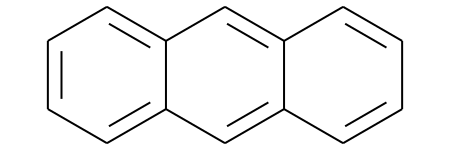

In [83]:
mol1 = Chem.MolFromSmiles(Chem.MolToSmiles(Chem.MolFromSmiles(smi2)))
mol1

In [86]:
G = mol_to_nx(mol1)
G

In [87]:
mol2 = nx_to_mol(G)

In [93]:
chiral_tags = nx.get_node_attributes(G, 'chiral_tag')
chiral_tags

{0: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 1: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 2: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 3: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 4: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 5: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 6: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 7: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 8: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 9: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 10: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 11: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 12: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
 13: rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED}

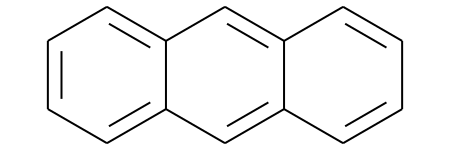

In [98]:
mol1

# Final realization
- Reference: https://github.com/rdkit/rdkit/issues/2788

In [103]:
import random

def randomSmiles(m1):
    m1.SetProp("_canonicalRankingNumbers", "True")
    idxs = list(range(0,m1.GetNumAtoms()))
    random.shuffle(idxs)
    for i,v in enumerate(idxs):
        m1.GetAtomWithIdx(i).SetProp("_canonicalRankingNumber", str(v))
    return Chem.MolToSmiles(m1)

In [114]:
smi = "c1cccc2cc3c(cccc3)cc12"
mol = Chem.MolFromSmiles(smi)
Chem.Kekulize(mol)
smi3 = Chem.MolToSmiles(mol, kekuleSmiles=True)
print(smi3)

C1=CC2=CC3=C(C=CC=C3)C=C2C=C1


In [116]:
smi = "c1ccc2cc3ccccc3cc2c1"
mol = Chem.MolFromSmiles(smi)

s1 = set()
for i in range(1000):
    smiles = randomSmiles(mol)
    s1.add(smiles)
print("Converting from all possibilities of smi1 :")
print()
print(s1)

s2 = set()
for smi in s1:
    mol = Chem.MolFromSmiles(smi)
    Chem.Kekulize(mol)
    s2.add(Chem.MolToSmiles(mol, kekuleSmiles=True))
print()
print("To all possibilities of smi2, kekulized form:")
print(s2)


Converting from all possibilities of smi1 :

{'c1ccc2c(cc3c(c2)cccc3)c1', 'c1ccc2c(c1)cc1ccccc1c2', 'c12c(cc3c(cccc3)c1)cccc2', 'c1cccc2cc3ccccc3cc12', 'c1cc2c(cc3ccccc3c2)cc1', 'c1cc2c(cc1)cc1ccccc1c2', 'c12cc3ccccc3cc1cccc2', 'c12cc3c(cccc3)cc1cccc2', 'c1ccc2cc3ccccc3cc2c1', 'c1cc2cc3c(cccc3)cc2cc1', 'c1cc2c(cc1)cc1c(cccc1)c2', 'c1c2c(cc3c1cccc3)cccc2', 'c1c2c(cc3ccccc3c2)ccc1', 'c1cc2cc3c(cc2cc1)cccc3', 'c1c2c(ccc1)cc1ccccc1c2', 'c1c2c(ccc1)cc1c(cccc1)c2', 'c1c2ccccc2cc2ccccc12', 'c1c2c(cc3ccccc13)cccc2', 'c1c2c(cc3c(c2)cccc3)ccc1', 'c12c(cccc1)cc1ccccc1c2', 'c1ccc2c(c1)cc1c(c2)cccc1', 'c1c2ccccc2cc2c1cccc2', 'c1ccc2cc3c(cc2c1)cccc3', 'c12ccccc1cc1c(c2)cccc1', 'c1c2c(ccc1)cc1c(c2)cccc1', 'c1ccc2c(c1)cc1c(cccc1)c2', 'c1cc2cc3ccccc3cc2cc1', 'c1c2cc3c(cc2ccc1)cccc3', 'c12ccccc1cc1ccccc1c2', 'c12ccccc1cc1c(cccc1)c2', 'c1cc2c(cc3c(c2)cccc3)cc1', 'c1cccc2cc3c(cccc3)cc12', 'c1c2c(cccc2)cc2c1cccc2', 'c1cc2c(cc3c(cccc3)c2)cc1', 'c1c2cc3ccccc3cc2ccc1', 'c1ccc2cc3c(cccc3)cc2c1', 'c12cc3c(cc1cc

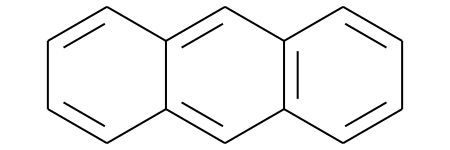

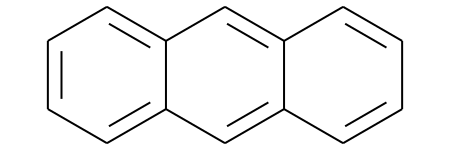

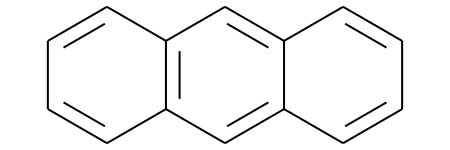

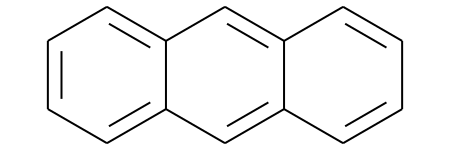

In [118]:
for smi in s2:
    display(Chem.MolFromSmiles(smi))